In [1]:
import numpy as np
import owlmPy as ow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

<h1><center>Ingreso de Valores </center></h1>

In [2]:
theta = 45
incidente = 1
lambd = 633
ds = np.array([0,134,134,134,0])
index = np.array([1,2.53,1.5,1.38,1])

In [3]:
ow.twobytwo(index,ds,theta,lambd, "s")

{'t': (0.9073459163538993+0.34716752694436004j),
 'r': (-0.16380030156780528+0.17136965168178683j),
 'T': 0.9438019036887602,
 'R': 0.0561980963112409,
 'A': -1.0547118733938987e-15}

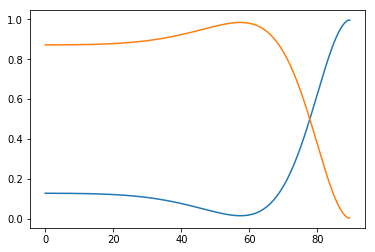

In [4]:
step=0.5;
theta_ini=np.arange(0,90,step)
data = ow.twobytwo_thetas(index,ds,theta_ini,lambd, "s")
R=data['R']
T=data['T']
plt.plot(theta_ini,R)
plt.plot(theta_ini,T)

In [5]:
lambdas=np.arange(10,1000,1)
R=np.zeros((lambdas.shape[0],theta_ini.shape[0]))
T=np.zeros((lambdas.shape[0],theta_ini.shape[0]))
for i in range(lambdas.shape[0]):
    data = ow.twobytwo_thetas(index,ds,theta_ini,lambd, "s")
    R[i]=data['R']
    T[i]=data['T']

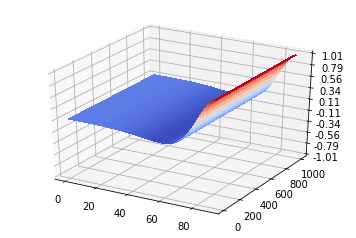

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = theta_ini
Y = lambdas
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()